In [26]:
import os
import re
import time

import warnings
warnings.filterwarnings(action = 'ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
plt.rcParams['font.family'] = 'AppleGothic'

from datetime import datetime

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.select import Select
from webdriver_manager.chrome import ChromeDriverManager

In [6]:
# Selenium 옵션 생성
options = webdriver.ChromeOptions()

# 크롬 창을 생성하지 않고 수행할 수 있도록 옵션 지정
options.add_argument('headless')

# Chrome Driver 실행
driver = webdriver.Chrome(ChromeDriverManager().install(), options = options)

# 최대 크기로 실행
driver.maximize_window()

# 연안체험활동현황 - 신고처리현황 페이지 URL
driver.get('https://imsm.kcg.go.kr/CSMS/main/sta/StaSttusListRB.do')
time.sleep(0.5)

# '신고수리완료' 데이터만 수집하기 위해 '신고수리완료' 클릭
select = Select(driver.find_element_by_id('searchKey2'))
select.select_by_visible_text('신고수리완료')

# '검색' 버튼 클릭
driver.find_element_by_xpath('//*[@id="dmgList"]/section[1]/div[2]/table/tbody/tr[3]/td[3]/div/button').click()

# 변수명을 저장하기 위한 Source 추출
column_source = driver.page_source
column_soup = BeautifulSoup(column_source, 'html.parser')

# 변수명 저장
columns_list = [value.get_text().strip() for value in column_soup.select('thead > tr.aliceBlue')[0].find_all('th')]

# 후에 무한 루프를 빠져나오기 위한 변수 생성
check_point = True

# 초기 페이지 번호 지정
page_number = 1

# 페이지를 반복하면서 수집한 값들을 저장하기 위한 리스트 생성
values_list = []

while check_point:
    
    print('{} 페이지 정보를 수집합니다.'.format(page_number), '\n')
    
    # 해당 페이지 Source 저장
    source = driver.page_source
    soup = BeautifulSoup(source, 'html.parser')
    
    # 수집하고자 하는 정보들은 <table> 태그 아래 <tbody> 태그 아래 <tr> 태그들로 이루어져 있다.
    tr_tag_list = soup.select('#dmgList > section:nth-child(8) > div.panel-body > table > tbody > tr')
    
    # <tr> 태그를 반복하면서 해당 태그 아래 <td> 태그에 값들이 있으므로 추출하여 저장해주도록 한다.
    for tr_tag in tr_tag_list:
        values_list.append([td_tag.get_text().strip() for td_tag in tr_tag.find_all('td')])
    
    # 해당 페이지의 데이터를 다 수집한 후, 페이지 번호를 1 증가시키도록 한다.
    page_number += 1
    
    # 페이지 번호를 증가하면서 11, 21, 31, ...인 경우에는 '>>' 버튼을 클릭해주어야 한다.
    if page_number % 10 == 1:
        driver.find_element_by_xpath('//*[@id="dmgList"]/section[2]/div[2]/div/ul/li[13]/a').click()
        time.sleep(1)
        
    # 그 외의 경우에는 해당 페이지 번호를 클릭하여 페이지를 변경해주면 된다.
    else:
        
        # 시간이 지날수록 신고건수가 증가하기 때문에 마지막 페이지 번호를 알 수 없으므로 예외처리 구문을 추가해주었다.
        try:
            driver.find_element_by_link_text('{}'.format(page_number)).click()
        
        # 페이지 번호를 증가시키고, 해당 페이지를 클릭했을 때 페이지가 없는 경우에는 오류가 발생한다. 
        except:
            print('데이터 수집이 끝났습니다.')
            driver.close()
            check_point = False



====== WebDriver manager ======
Current google-chrome version is 94.0.4606
Get LATEST driver version for 94.0.4606
Driver [/Users/yangjaeyeong/.wdm/drivers/chromedriver/mac64/94.0.4606.61/chromedriver] found in cache


1 페이지 정보를 수집합니다. 

2 페이지 정보를 수집합니다. 

3 페이지 정보를 수집합니다. 

4 페이지 정보를 수집합니다. 

5 페이지 정보를 수집합니다. 

6 페이지 정보를 수집합니다. 

7 페이지 정보를 수집합니다. 

8 페이지 정보를 수집합니다. 

9 페이지 정보를 수집합니다. 

10 페이지 정보를 수집합니다. 

11 페이지 정보를 수집합니다. 

12 페이지 정보를 수집합니다. 

13 페이지 정보를 수집합니다. 

14 페이지 정보를 수집합니다. 

15 페이지 정보를 수집합니다. 

16 페이지 정보를 수집합니다. 

17 페이지 정보를 수집합니다. 

18 페이지 정보를 수집합니다. 

19 페이지 정보를 수집합니다. 

20 페이지 정보를 수집합니다. 

21 페이지 정보를 수집합니다. 

22 페이지 정보를 수집합니다. 

23 페이지 정보를 수집합니다. 

24 페이지 정보를 수집합니다. 

25 페이지 정보를 수집합니다. 

26 페이지 정보를 수집합니다. 

27 페이지 정보를 수집합니다. 

28 페이지 정보를 수집합니다. 

29 페이지 정보를 수집합니다. 

30 페이지 정보를 수집합니다. 

31 페이지 정보를 수집합니다. 

32 페이지 정보를 수집합니다. 

33 페이지 정보를 수집합니다. 

34 페이지 정보를 수집합니다. 

35 페이지 정보를 수집합니다. 

36 페이지 정보를 수집합니다. 

37 페이지 정보를 수집합니다. 

38 페이지 정보를 수집합니다. 

39 페이지 정보를 수집합니다. 

40 페이지 정보를 수집합니다. 

41 페이지 정보를 수집합니다. 

42 페이지 정보를 수집합니다. 

43 페이지 정보를 수집합니다. 

44 페이지 정보를 수집합니다. 

45 페이지 정보를 수집합니다. 

46 페이지 정보를 수집합니다. 

47 페이지 정보를 수집합니다. 

48 페이지 정보를 수집합니다. 

49 페이지 정보를 수집합니다. 

50 페이지 정보를 수집합니다. 

51 페이지 정보

In [7]:
# 수집한 데이터를 DataFrame으로 저장
report_data = pd.DataFrame(data = values_list, columns = columns_list)

print('Shape of Report data :', report_data.shape, '\n')
display(report_data.head())

Shape of Report data : (950, 9) 



,번호,처리현황,신고번호,접수일자,운영자,신고종류,활동종류,활동기간,비고
0,1,신고수리완료,2021-여수-102,2021-10-10,강 * *,건별 신고,수중,2021-10-10 ~ 2021-10-10,-
1,2,신고수리완료,2021-여수-101,2021-10-09,강 * *,건별 신고,수중,2021-10-09 ~ 2021-10-09,-
2,3,신고수리완료,2021-여수-98,2021-10-04,강 * *,건별 신고,수중,2021-10-04 ~ 2021-10-04,-
3,4,신고수리완료,2021-여수-92,2021-10-03,강 * *,건별 신고,수중,2021-10-03 ~ 2021-10-03,-
4,5,신고수리완료,2021-여수-94,2021-10-03,강 * *,건별 신고,수중,2021-10-03 ~ 2021-10-03,-


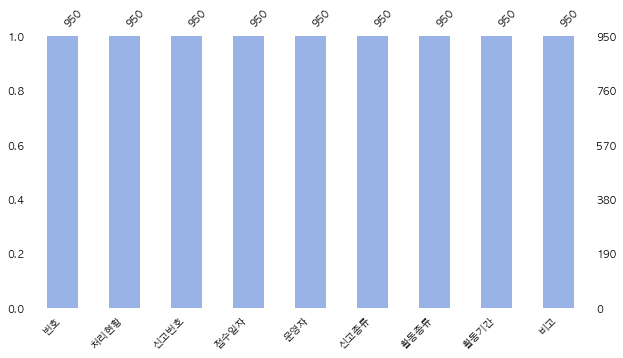

In [25]:
# 수집한 데이터의 결측치 확인
msno.bar(report_data, figsize = (10, 5), fontsize = 10, color = (0.6, 0.7, 0.9));

In [27]:
# 데이터 보존을 위해 데이터 복사
final_data = report_data.copy()
print('Shape of final data *Before Create* :', final_data.shape, '\n')

# '신고번호' 변수를 사용하여 '지역' 변수 생성
final_data['지역'] = final_data['신고번호'].apply(lambda x: x.split('-')[1].strip())

# '활동기간' 변수를 사용하여 '활동시작일', '활동마지막일' 두 개의 변수 생성
final_data['활동시작일'] = final_data['활동기간'].apply(lambda x: datetime.strptime(x.split('~')[0].strip(), '%Y-%m-%d'))
final_data['활동마지막일'] = final_data['활동기간'].apply(lambda x: datetime.strptime(x.split('~')[-1].strip(), '%Y-%m-%d'))

# 활동시작일과 활동마지막일 두 변수를 사용하여 '기간' 변수 생성
final_data['기간'] = (final_data['활동마지막일'] - final_data['활동시작일']).dt.days

print('Shape of final data *After Create* :', final_data.shape, '\n')
display(final_data.head())

Shape of final data *Before Create* : (950, 9) 

Shape of final data *After Create* : (950, 13) 



,번호,처리현황,신고번호,접수일자,운영자,신고종류,활동종류,활동기간,비고,지역,활동시작일,활동마지막일,기간
0,1,신고수리완료,2021-여수-102,2021-10-10,강 * *,건별 신고,수중,2021-10-10 ~ 2021-10-10,-,여수,2021-10-10,2021-10-10,0
1,2,신고수리완료,2021-여수-101,2021-10-09,강 * *,건별 신고,수중,2021-10-09 ~ 2021-10-09,-,여수,2021-10-09,2021-10-09,0
2,3,신고수리완료,2021-여수-98,2021-10-04,강 * *,건별 신고,수중,2021-10-04 ~ 2021-10-04,-,여수,2021-10-04,2021-10-04,0
3,4,신고수리완료,2021-여수-92,2021-10-03,강 * *,건별 신고,수중,2021-10-03 ~ 2021-10-03,-,여수,2021-10-03,2021-10-03,0
4,5,신고수리완료,2021-여수-94,2021-10-03,강 * *,건별 신고,수중,2021-10-03 ~ 2021-10-03,-,여수,2021-10-03,2021-10-03,0


In [28]:
# 제공할 변수만 지정하여 저장
final_data = final_data[['번호', '처리현황', '신고번호', '지역', '접수일자', '신고종류', '활동종류', '활동시작일', '활동마지막일', '기간']]
display(final_data.head())

,번호,처리현황,신고번호,지역,접수일자,신고종류,활동종류,활동시작일,활동마지막일,기간
0,1,신고수리완료,2021-여수-102,여수,2021-10-10,건별 신고,수중,2021-10-10,2021-10-10,0
1,2,신고수리완료,2021-여수-101,여수,2021-10-09,건별 신고,수중,2021-10-09,2021-10-09,0
2,3,신고수리완료,2021-여수-98,여수,2021-10-04,건별 신고,수중,2021-10-04,2021-10-04,0
3,4,신고수리완료,2021-여수-92,여수,2021-10-03,건별 신고,수중,2021-10-03,2021-10-03,0
4,5,신고수리완료,2021-여수-94,여수,2021-10-03,건별 신고,수중,2021-10-03,2021-10-03,0


```python
final_data.to_csv('./SaveData/해양경찰청_연안체험활동 신고현황.csv', encoding = 'CP949', index = False)
```